In [4]:
import scipy.stats as stats #It has all the probability distributions available along with many statistical functions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
sns.set(style="darkgrid") # set the background for the graphs
from scipy.stats import skew

In [5]:
df = pd.read_csv('insurance.csv')
insured=df.copy()#keeping a copy of the original file

In [6]:
insured.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [7]:
insured.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [8]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
insured.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [10]:
insured.shape

(1338, 7)

In [11]:
insured.sex=insured['sex'].astype("category")
insured.smoker=insured['smoker'].astype("category")
insured.region=insured['region'].astype("category")

In [12]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   expenses  1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [13]:
insured.describe(include='category')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [14]:
list_col=insured.select_dtypes(['category']).columns
list_col

Index(['sex', 'smoker', 'region'], dtype='object')

In [15]:
for i in list_col:
    print(insured[i].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


In [16]:
#or 
for i in range(len(list_col)):
    print(insured[list_col[i]].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


# Basic Alternate Visualization
# univariant

676 662


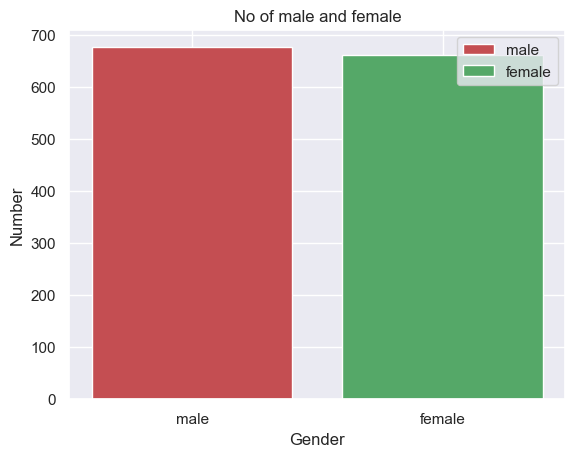

In [18]:
no_of_male = len(insured[insured['sex'] == 'male'])
no_of_female = len(insured[insured['sex'] == 'female'])
print(no_of_male,no_of_female)

plt.bar(['male','female'],[no_of_male,no_of_female],color = ['r','g'],label = ['male','female'])
plt.title("No of male and female")
plt.xlabel("Gender")
plt.ylabel("Number")
plt.legend()
plt.show()

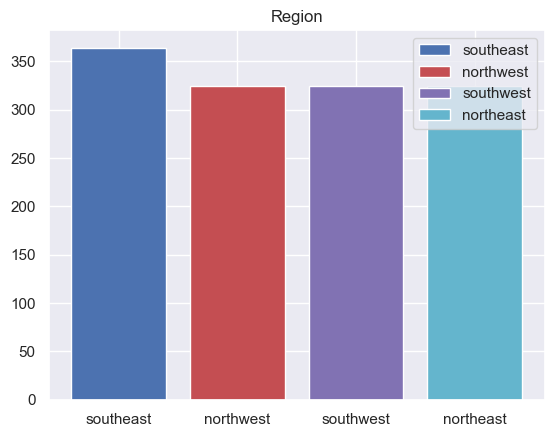

In [19]:
southeast = len(insured[insured['region'] == 'southeast'])
northwest = len(insured[insured['region'] == 'northwest'])
southwest = len(insured[insured['region'] == 'southwest'])
northeast = len(insured[insured['region'] == 'northeast'])


plt.bar(['southeast','northwest','southwest','northeast'],
 [southeast,northwest,southwest,northeast], label=['southeast','northwest','southwest','northeast'],
        color = ['b','r','m','c'])
plt.title('Region')
plt.legend()
plt.show()

In [20]:
list_col=  insured.select_dtypes(['category']).columns
for i in range(len(list_col)):
     print(list(insured[list_col[i]].value_counts().index), list(insured[list_col[i]].value_counts()))

['male', 'female'] [676, 662]
['no', 'yes'] [1064, 274]
['southeast', 'northwest', 'southwest', 'northeast'] [364, 325, 325, 324]


In [21]:
data = {}
list_col=  insured.select_dtypes(['category']).columns
for i in range(len(list_col)):
  values = list(insured[list_col[i]].value_counts())
  subcategory = list(insured[list_col[i]].value_counts().index)
  # data['x'] = values
  data[list_col[i]] = [subcategory,values]

data

{'sex': [['male', 'female'], [676, 662]],
 'smoker': [['no', 'yes'], [1064, 274]],
 'region': [['southeast', 'northwest', 'southwest', 'northeast'],
  [364, 325, 325, 324]]}

In [22]:
print(data['region'][0])
print(data['region'][1])

['southeast', 'northwest', 'southwest', 'northeast']
[364, 325, 325, 324]


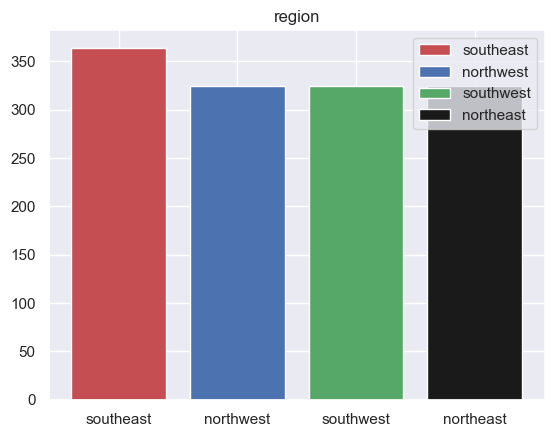

In [23]:
plt.bar(data['region'][0], data['region'][1],label=['southeast', 'northwest', 'southwest', 'northeast'],
        color = ['r','b','g','k'])
plt.legend()
plt.title("region")
plt.show()

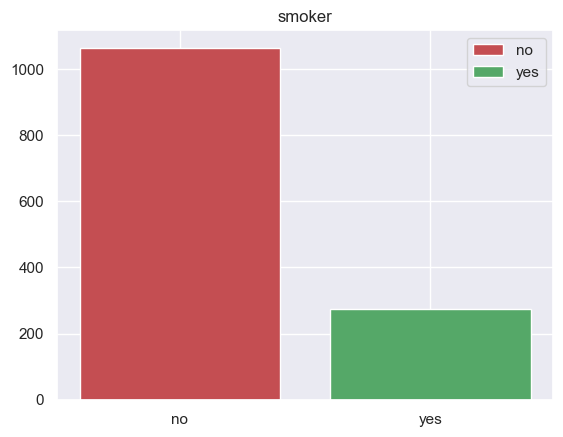

In [24]:
plt.bar(data['smoker'][0],data['smoker'][1],label=['no','yes'],color=['r','g'])
plt.legend()
plt.title("smoker")
plt.show()

[['male', 'female'], [676, 662]]


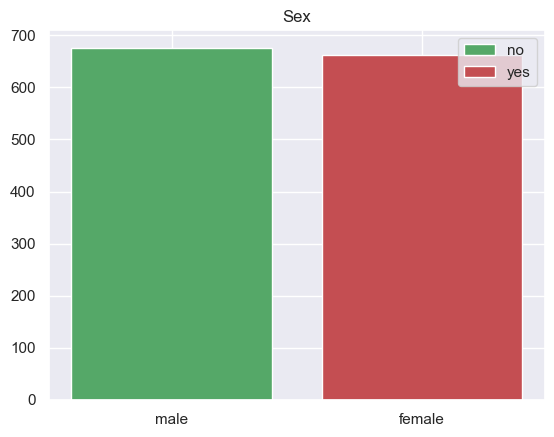

In [25]:
print(data['sex'])
plt.bar(data['sex'][0],data['sex'][1],
        label=['no','yes'],
        color = ['g','r'])
plt.title('Sex')
plt.legend()
plt.show()

# bivariant and multivariant

In [27]:
insured.corr()#correlation
#if positive corr then if one increases other also increases
#for eg in case of bmi and age it increases by 0.109341

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


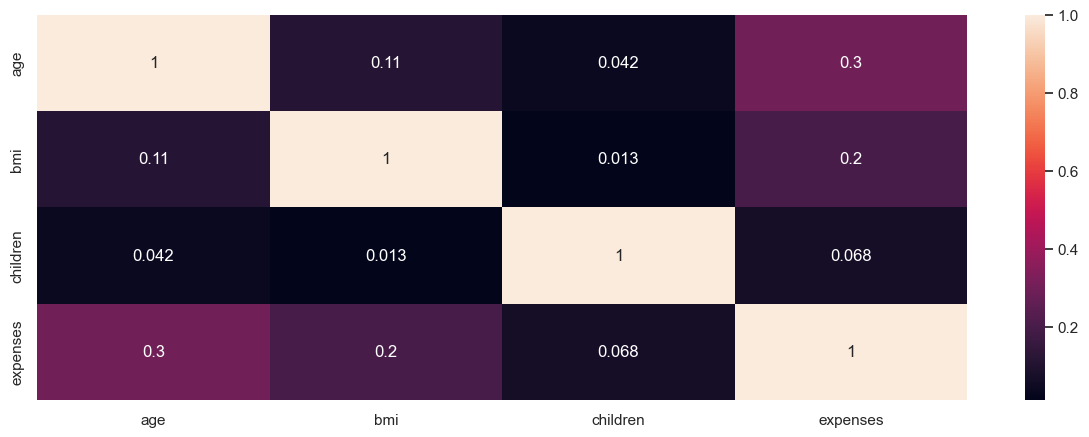

In [28]:
#Heatmap
#sns->seaborn
#relationship's value
#show the correlation
plt.figure(figsize=(15,5))
sns.heatmap(insured.corr(),annot=True)
plt.show()

<Figure size 500x500 with 0 Axes>

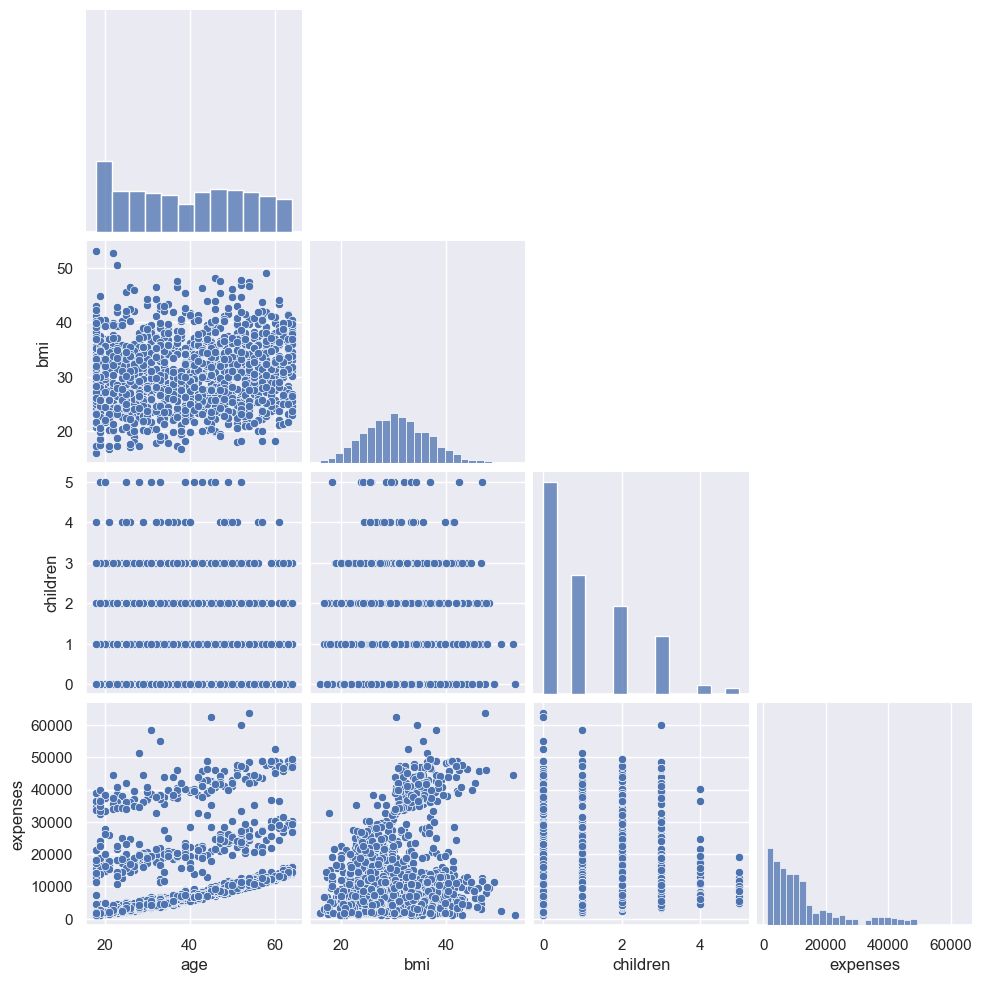

In [29]:
#Pairplot
#relationship's visualization
plt.figure(figsize=(5,5))
sns.pairplot(data=insured , corner=True)
plt.show()

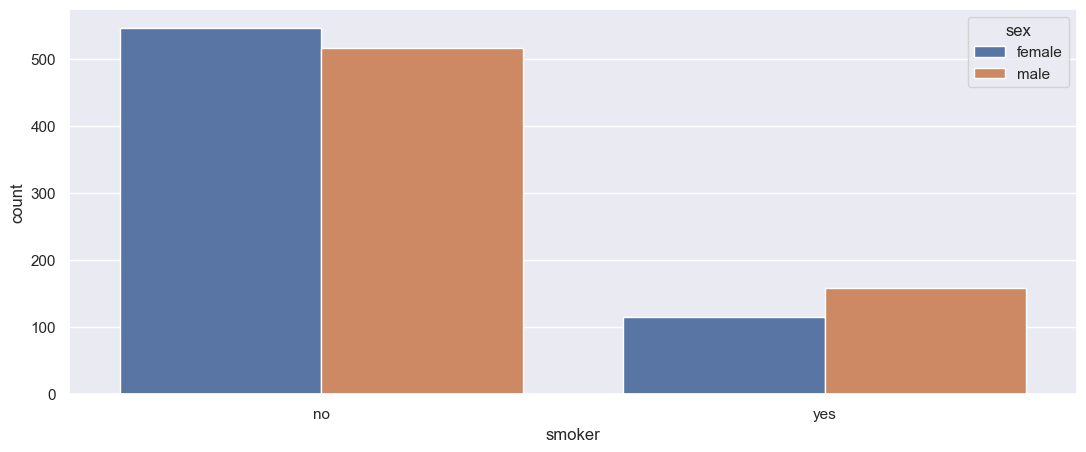

In [30]:
#smoker vs Sex
#countplot is used for data which is both categorical
plt.figure(figsize=(13,5))
ax=sns.countplot(x='smoker',hue='sex',data=insured)
# bar_perc(ax,insured['sex']) #to show percentage

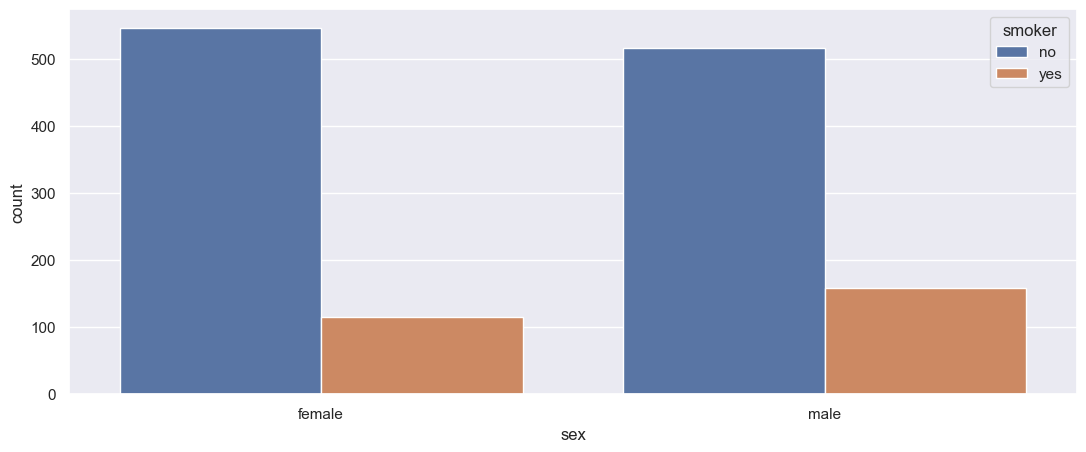

In [31]:
#Sex vs smoker
plt.figure(figsize=(13,5))
ax=sns.countplot(x='sex',hue='smoker',data=insured)
# bar_perc(ax,insured['smoker'])

[Text(0.5, 1.0, 'Smoker vs Charges')]

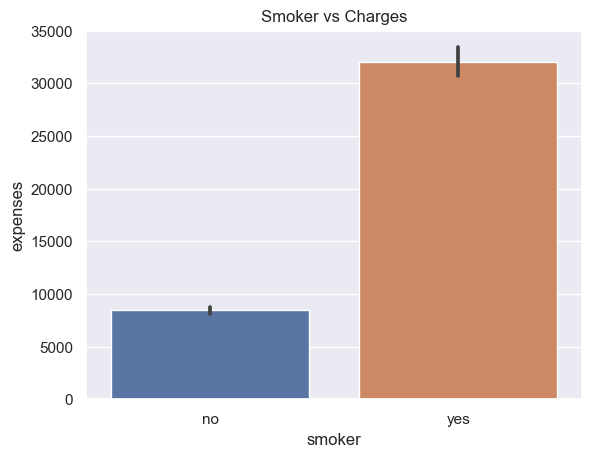

In [32]:
#smoker vs charges
#barplot can be used when we have one categorical data and the other non-categorical
sns.barplot(x=insured.smoker,y=insured.expenses).set(title="Smoker vs Charges")

[Text(0.5, 1.0, 'Smoker vs Region')]

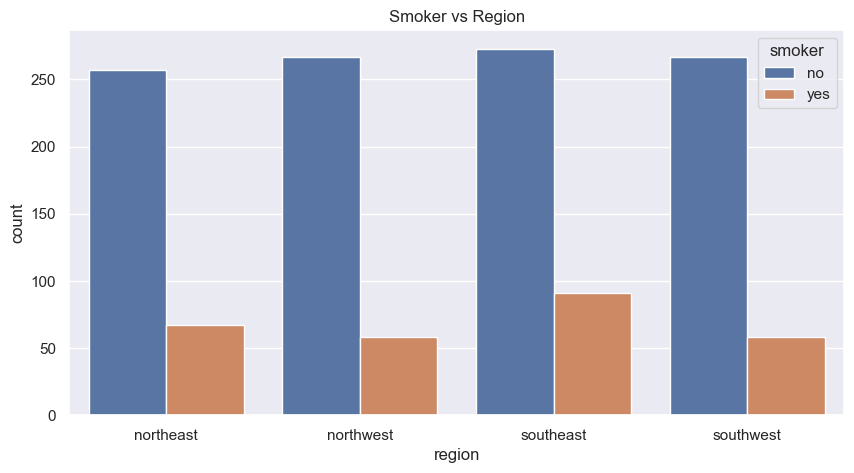

In [33]:
#region vs smoker
plt.figure(figsize=(10,5))
ax=sns.countplot(x='region',hue='smoker',data=insured)
# bar_perc(ax,insured['smoker'])
ax.set(title="Smoker vs Region")

[Text(0.5, 1.0, 'Smoker vs Region')]

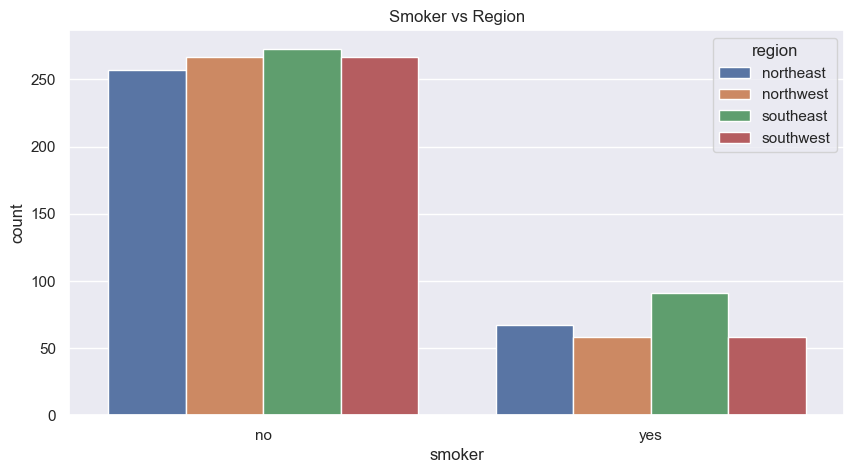

In [34]:
#smoker vs region
plt.figure(figsize=(10,5))
ax=sns.countplot(x='smoker',hue='region',data=insured)
# bar_perc(ax,insured['region'])
ax.set(title="Smoker vs Region")

[Text(0.5, 1.0, 'Sex vs Region')]

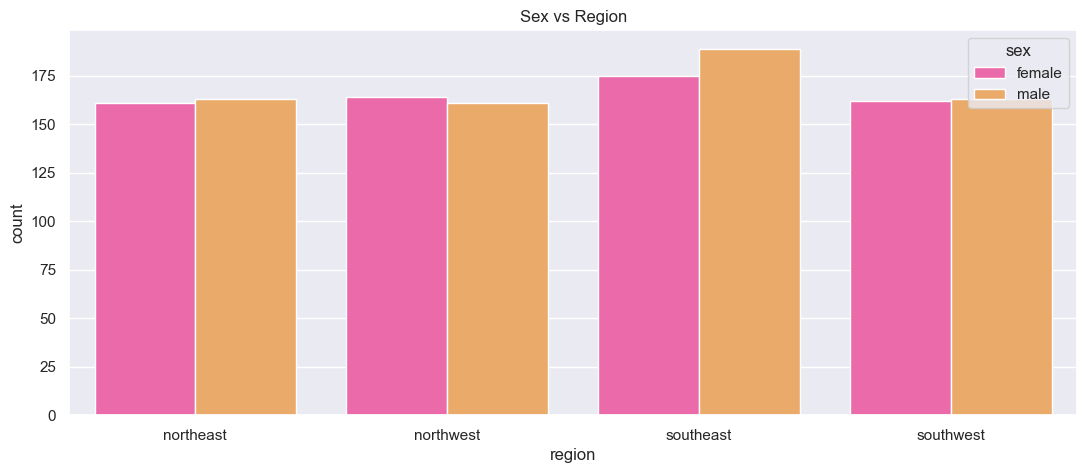

In [35]:
#same but different design
plt.figure(figsize=(13,5))
ax=sns.countplot(x='region',hue='sex',data=insured,palette='spring')
# bar_perc(ax,insured['sex'])
ax.set(title="Sex vs Region")

In [36]:
# GROUP BY

#mean,sum,min,max,median

In [37]:
insured.groupby(insured.sex).expenses.mean()      #GROUP BY BY SEX

sex
female    12569.578897
male      13956.751420
Name: expenses, dtype: float64

In [42]:
insured.groupby(insured.region).expenses.max()

region
northeast    58571.07
northwest    60021.40
southeast    63770.43
southwest    52590.83
Name: expenses, dtype: float64

In [41]:
insured.groupby(insured.smoker).expenses.sum()      #GROUP BY BY smoker

smoker
no     8974061.63
yes    8781763.56
Name: expenses, dtype: float64

In [44]:
insured.groupby(insured.children).expenses.median()      #GROUP BY BY children

children
0    12365.975767
1    12731.171821
2    15073.564000
3    15355.318535
4    13850.656800
5     8786.035556
Name: expenses, dtype: float64

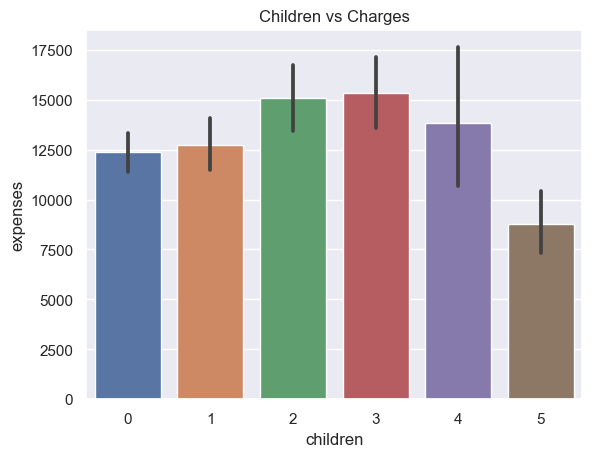

In [45]:
ax = sns.barplot(x=insured.children,y=insured.expenses).set(title="Children vs Charges")
# bar_perc(ax,insured['sex'])
# ax.set(title="Sex vs Region")

[Text(0.5, 1.0, 'Sex Vs Charges')]

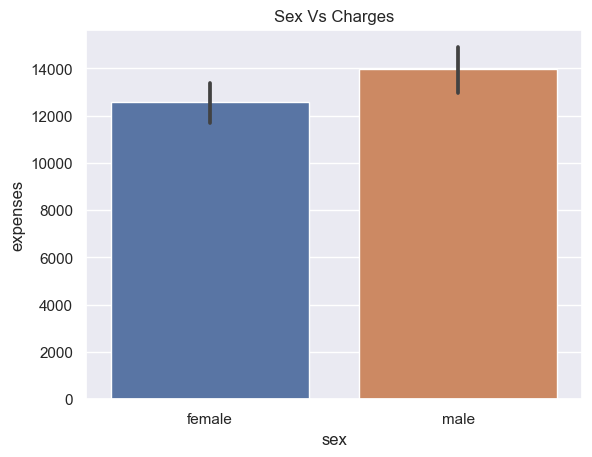

In [46]:
sns.barplot(x=insured.sex,y=insured.expenses).set(title='Sex Vs Charges')

[Text(0.5, 1.0, 'Region Vs Charges')]

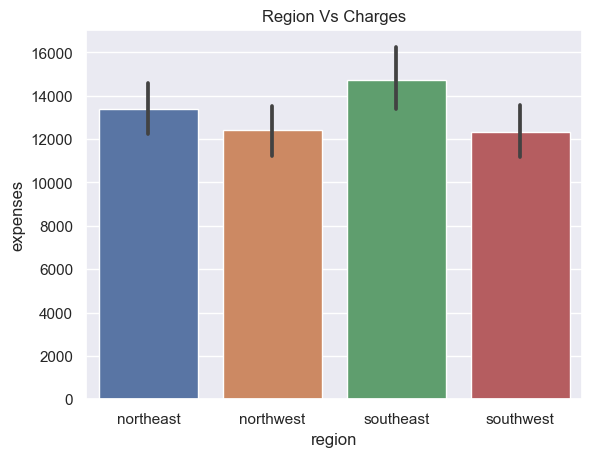

In [47]:
sns.barplot(x='region',y='expenses',data=insured).set(title='Region Vs Charges')

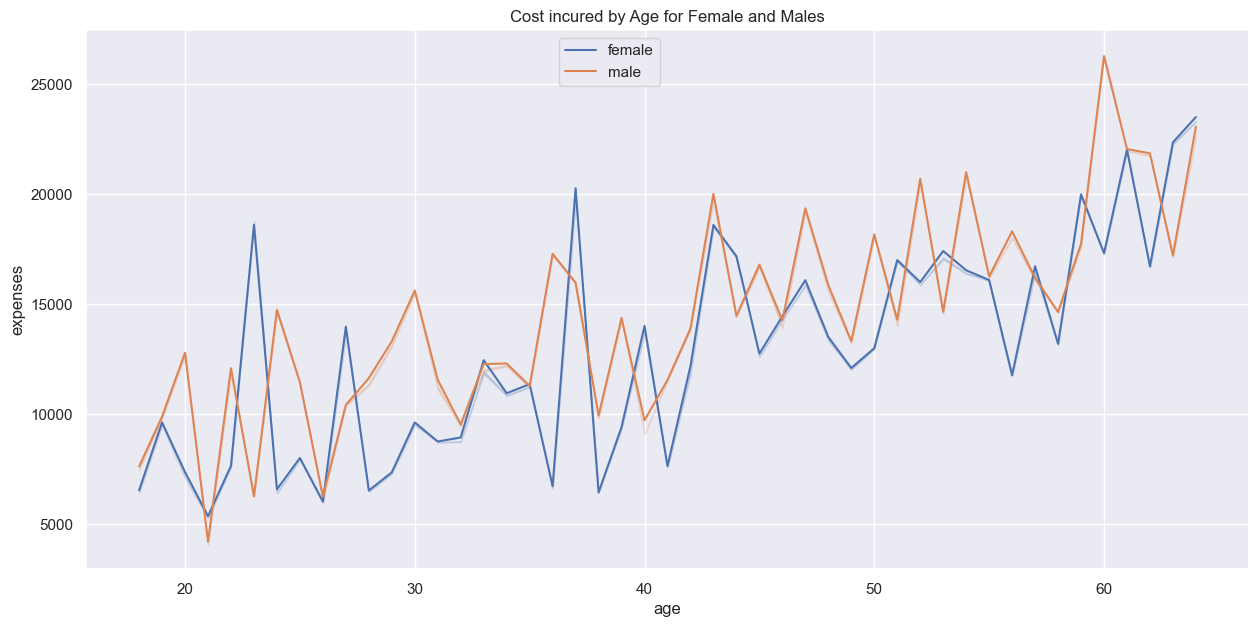

In [48]:
#multivariate
plt.figure(figsize=(15,7))
sns.lineplot(x = insured["age"], y =insured["expenses"],hue=insured["sex"],ci=1).set(title= 'Cost incured by Age for Female and Males')
plt.legend(bbox_to_anchor=(0.5, 1))#gives the input of   where to put the legend
plt.show()

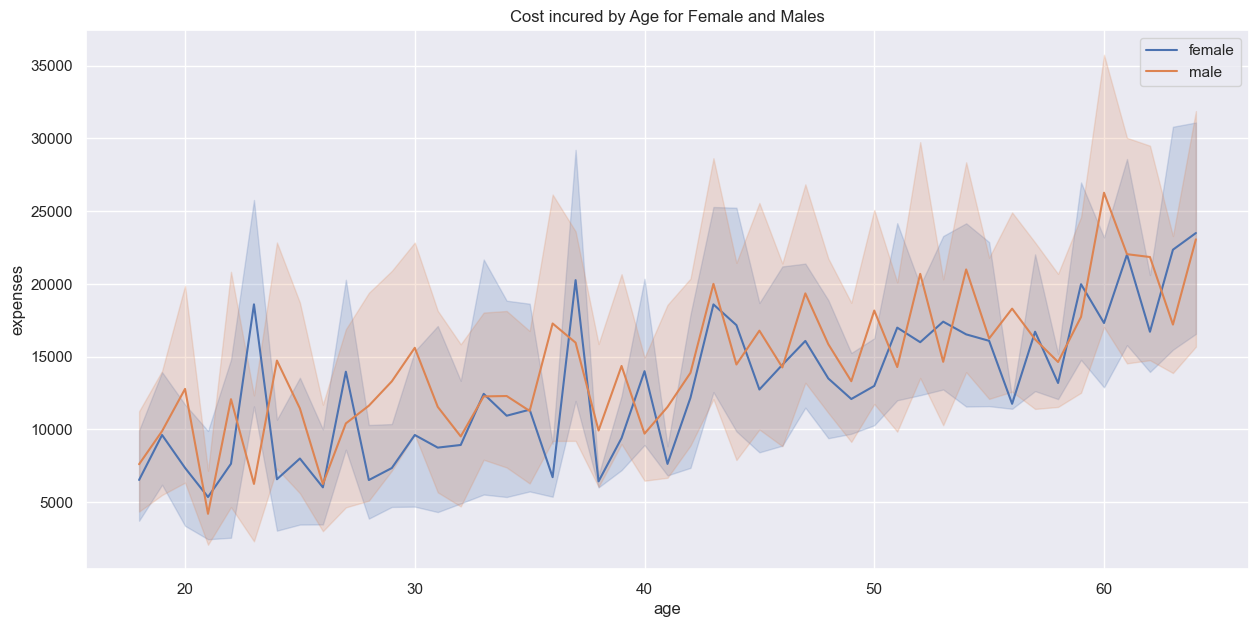

In [49]:
plt.figure(figsize=(15,7))
sns.lineplot(x = insured["age"], y =insured["expenses"],hue=insured["sex"]).set(title= 'Cost incured by Age for Female and Males')
plt.legend()
plt.show()

In [50]:
#Cross tab
df_smoker_char_sex1=pd.crosstab(index=insured.smoker, columns=insured.sex  , values=insured.expenses, aggfunc='mean')
df_smoker_char_sex1

sex,female,male
smoker,,
no,8762.297367,8087.204971
yes,30678.996261,33042.006226


In [51]:
df_smoker_char_sex=pd.crosstab(index=insured.sex, columns=  insured.smoker, values=insured.expenses,aggfunc='sum')
df_smoker_char_sex

smoker,no,yes
sex,,
female,4792976.66,3528084.57
male,4181084.97,5253678.99


In [52]:
# plot directly from dataframe

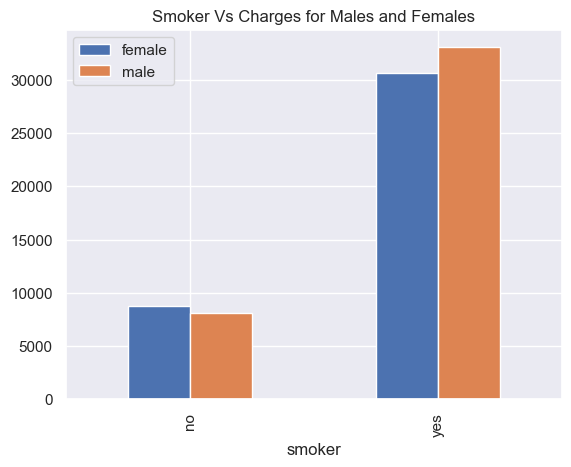

In [53]:
df_smoker_char_sex1.plot(kind='bar',title="Smoker Vs Charges for Males and Females")
plt.legend(loc='upper left')
plt.show()

In [54]:
df_smoker_char_sex=pd.crosstab(index=insured.region, columns=  insured.sex, values=insured.expenses,aggfunc='mean')
df_smoker_char_sex

sex,female,male
region,,
northeast,12953.203106,13854.005767
northwest,12479.870244,12354.119317
southeast,13499.669257,15879.617354
southwest,11274.411667,13412.884233


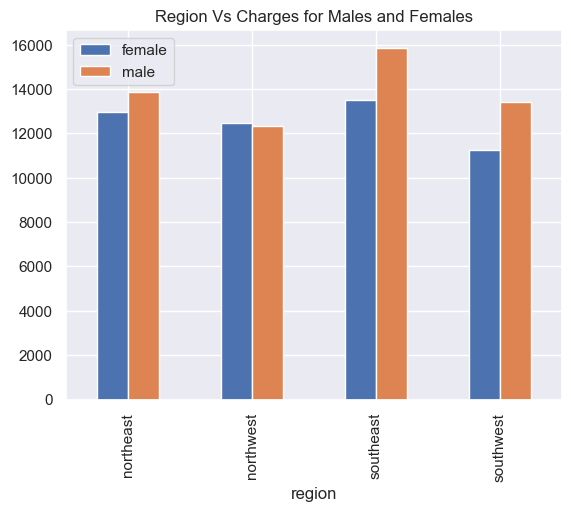

In [55]:
df_smoker_char_sex.plot(kind='bar',title="Region Vs Charges for Males and Females")
plt.legend(loc='upper left')
plt.show()

In [56]:
# converting quantitative data to qualitative
insured

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [57]:
#creating groups of bmi
category = pd.cut(insured.bmi,bins=[15,25,35,45,55],labels=['15-25','25-35','35-45','45-55'])
insured.insert(5,'BMIGroup',category)
#bins->indicate interval

In [58]:
insured.head()

,age,sex,bmi,children,smoker,BMIGroup,region,expenses
0,19,female,27.9,0,yes,25-35,southwest,16884.92
1,18,male,33.8,1,no,25-35,southeast,1725.55
2,28,male,33.0,3,no,25-35,southeast,4449.46
3,33,male,22.7,0,no,15-25,northwest,21984.47
4,32,male,28.9,0,no,25-35,northwest,3866.86


In [59]:
insured.groupby(insured.BMIGroup).expenses.mean()

BMIGroup
15-25    10284.290121
25-35    12720.254413
35-45    16913.681791
45-55    17547.927500
Name: expenses, dtype: float64

In [60]:
category1=pd.cut(insured.age,bins=[16,28,38,48,58,68],labels=['16-28','28-38','38-48','48-58','58-68'])
insured.insert(6,'AgeBin',category1)

In [61]:
insured.head()

,age,sex,bmi,children,smoker,BMIGroup,AgeBin,region,expenses
0,19,female,27.9,0,yes,25-35,16-28,southwest,16884.92
1,18,male,33.8,1,no,25-35,16-28,southeast,1725.55
2,28,male,33.0,3,no,25-35,16-28,southeast,4449.46
3,33,male,22.7,0,no,15-25,28-38,northwest,21984.47
4,32,male,28.9,0,no,25-35,28-38,northwest,3866.86


In [62]:
age_bin_cat = insured.groupby(insured.AgeBin).expenses.mean()
age_bin_cat

AgeBin
16-28     9096.110000
28-38    11598.555097
38-48    14334.586014
48-58    15887.954489
58-68    20824.973022
Name: expenses, dtype: float64

<AxesSubplot: title={'center': 'Agebins vs Avg Expenses'}, xlabel='AgeBin'>

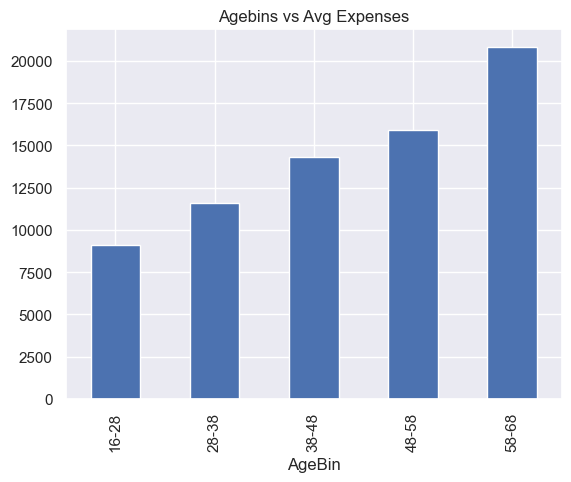

In [63]:
age_bin_cat.plot(kind='bar',title="Agebins vs Avg Expenses")


In [64]:
#multi variate data analysis
insured.groupby(['region','sex','smoker']).expenses.mean()

region     sex     smoker
northeast  female  no         9640.427121
                   yes       28032.045517
           male    no         8664.042640
                   yes       30926.252895
northwest  female  no         8786.998519
                   yes       29670.824828
           male    no         8320.689167
                   yes       30713.180690
southeast  female  no         8440.205396
                   yes       33034.821389
           male    no         7609.003731
                   yes       36029.839636
southwest  female  no         8234.091702
                   yes       31687.988571
           male    no         7778.906111
                   yes       32598.863784
Name: expenses, dtype: float64

In [65]:
#multi variate data analysis
insured.groupby(['region','sex','smoker']).expenses.sum()

region     sex     smoker
northeast  female  no        1272536.38
                   yes        812929.32
           male    no        1083005.33
                   yes       1175197.61
northwest  female  no        1186244.80
                   yes        860453.92
           male    no        1098330.97
                   yes        890682.24
southeast  female  no        1173188.55
                   yes       1189253.57
           male    no        1019606.50
                   yes       1981641.18
southwest  female  no        1161006.93
                   yes        665447.76
           male    no         980142.17
                   yes       1206157.96
Name: expenses, dtype: float64

In [68]:
df1 = insured.groupby(['region','sex','smoker']).expenses.mean().unstack()
df1

smoker                     no           yes
region    sex                              
northeast female  9640.427121  28032.045517
          male    8664.042640  30926.252895
northwest female  8786.998519  29670.824828
          male    8320.689167  30713.180690
southeast female  8440.205396  33034.821389
          male    7609.003731  36029.839636
southwest female  8234.091702  31687.988571
          male    7778.906111  32598.863784

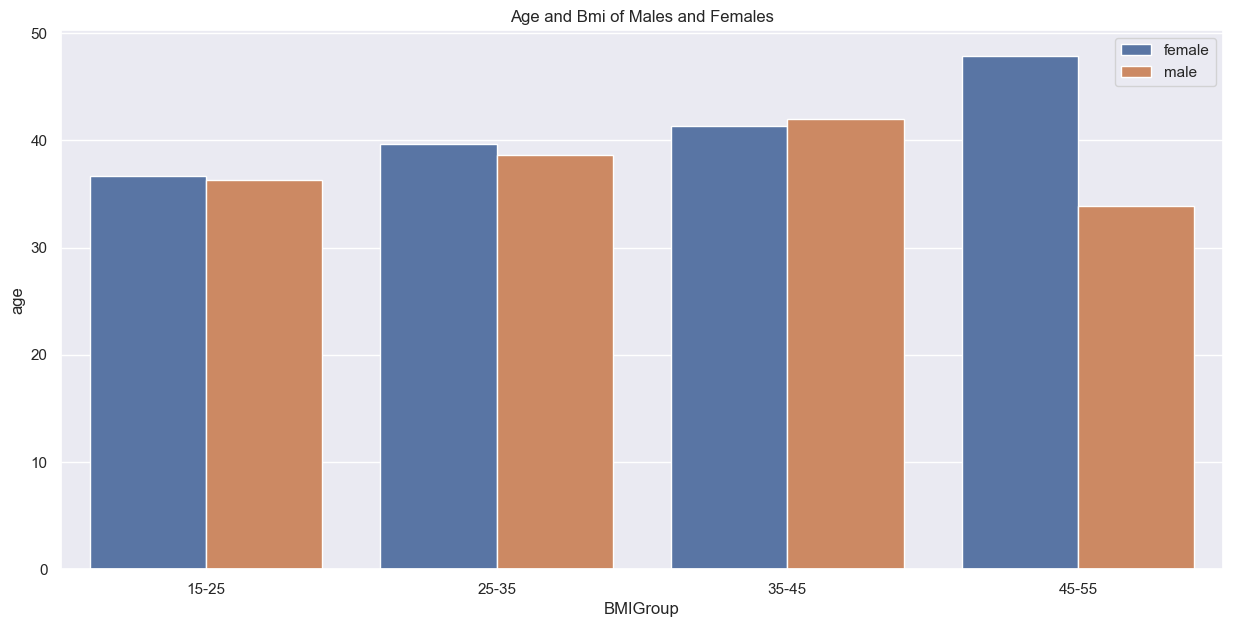

In [69]:
plt.figure(figsize=(15,7))
sns.barplot(x=insured["BMIGroup"],y=insured["age"],hue=insured['sex'],ci=0).set(title= 'Age and Bmi of Males and Females')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

[Text(0.5, 1.0, 'Fig 2:BMI group and Charges ')]

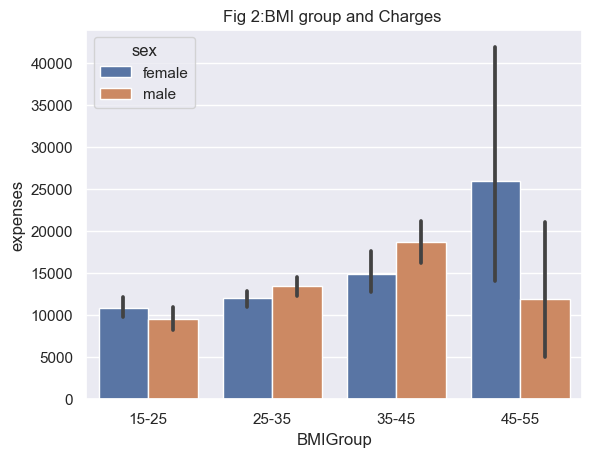

In [70]:
sns.barplot(x='BMIGroup',y='expenses',hue='sex',data=insured).set(title="Fig 2:BMI group and Charges " )

In [71]:
pd.crosstab(insured['sex'],insured['children'])


children,0,1,2,3,4,5
sex,,,,,,
female,289,158,119,77,11,8
male,285,166,121,80,14,10


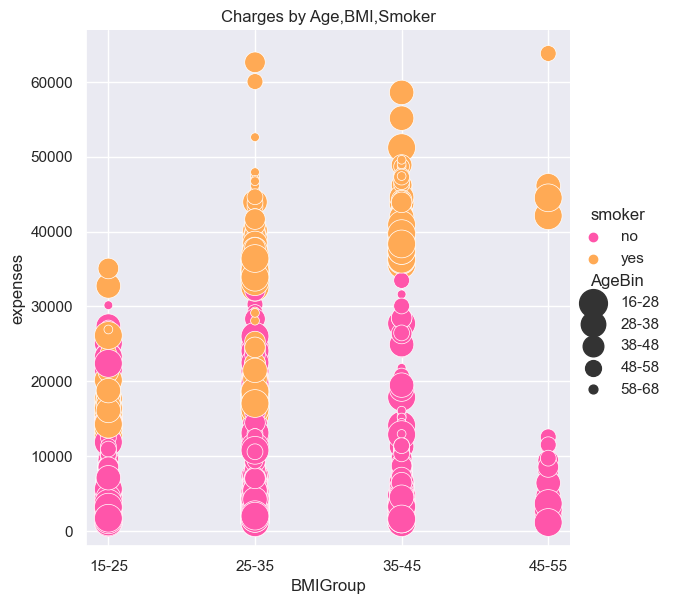

In [72]:
sns.relplot(x=insured.BMIGroup, y=insured.expenses, hue=insured.smoker, size= insured.AgeBin,
            sizes=(40, 400), palette="spring",
            height=6, data=insured).set(title='Charges by Age,BMI,Smoker');

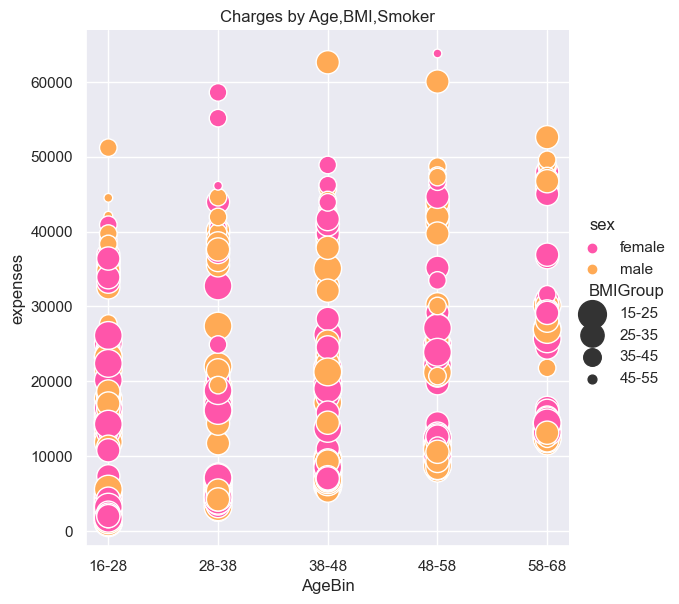

In [73]:
sns.relplot(x=insured.AgeBin, y=insured.expenses, hue=insured.sex, size= insured.BMIGroup,
            sizes=(40, 400), palette="spring",
            height=6, data=insured).set(title='Charges by Age,BMI,Smoker');